# Import Cells

In [1]:
import matplotlib.pyplot as plt, pandas as pd, numpy as np, scipy, sklearn

# Data Loading and Pre-Processing

In [29]:
# load data into dataframe using Pandas
train_data = pd.read_csv('train.csv')
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [30]:
# Drop the ticket, name, id columns - not relevant to final predictions
train_data = train_data.drop(['Ticket', 'Name', 'PassengerId'], axis=1)

# Encode the gender values to either 0 (male) or 1 (female)
train_data['Sex'] = train_data['Sex'].replace(['female', 'male'], [1, 0])

train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,0,22.0,1,0,7.2500,NaN,S
1,1,1,1,38.0,1,0,71.2833,C85,C
2,1,3,1,26.0,0,0,7.9250,NaN,S
3,1,1,1,35.0,1,0,53.1000,C123,S
4,0,3,0,35.0,0,0,8.0500,NaN,S


In [31]:
# Get basic statistical data about the data set
train_data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [32]:
# Split the data into positive/negative classes (survived vs not survived)
positive = train_data[train_data['Survived'] == 1]
negative = train_data[train_data['Survived'] != 1]

Text(0.5, 1.0, 'Ratio of Survivors (1) vs Deaths (0) in Data')

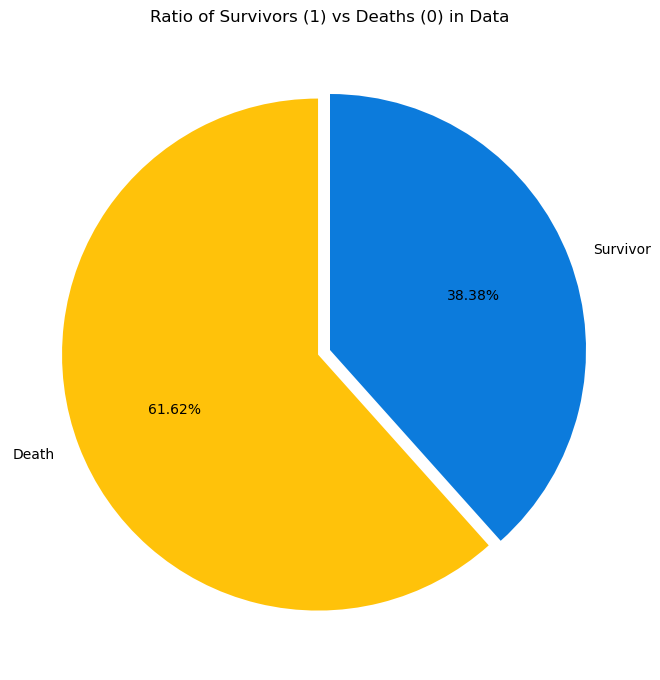

In [43]:
# Create a pie chart showing the disparity between positive (survived) and negative (died) classes
total_cases = train_data['Survived'].size
pos_cases = positive.size
neg_cases = negative.size

pos_ratio = pos_cases/total_cases
neg_ratio = neg_cases/total_cases

chart_sizes = [neg_ratio, pos_ratio]

# Try to choose colors that are accessable to all. Link below explains.
# https://davidmathlogic.com/colorblind/#%23D81B60-%231E88E5-%23FFC107-%23004D40
pie_colors = ['#FFC20A', '#0C7BDC']

# Set size of chart
pie_chart = plt.figure(figsize = (8,8))
pie_chart = pie_chart.add_axes([0.1, 0.1, 0.8, 0.8])

labels = ['Death', 'Survivor'] # Pie Chart labels for the classes 
explode = (0.05, 0) # Makes one of the wedges of the chart "stand out"


pies = pie_chart.pie(chart_sizes, explode = explode, labels = labels, colors = pie_colors, autopct = '%1.2f%%', 
                     shadow=False, startangle = 90)

# Add title to chart
plt.title('Ratio of Survivors (1) vs Deaths (0) in Data')

In [44]:
# Check and see which columns contain empty or null values
positive.isna().sum()

Survived      0
Pclass        0
Sex           0
Age          52
SibSp         0
Parch         0
Fare          0
Cabin       206
Embarked      2
dtype: int64

In [45]:
negative.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         125
SibSp         0
Parch         0
Fare          0
Cabin       481
Embarked      0
dtype: int64

In [ ]:
# The NA/Missing values must be handled 

In [8]:
# As it turns out, most of the data belonging to what cabin people were in is not provided. Drop the column.
# ~77% of the data does not contain data for the field. Cannot be deemed relevant in this case. 
no_cabin = 481 + 206
no_cabin_ratio = no_cabin/891
print(no_cabin_ratio)

train_data = train_data.drop(['Cabin'], axis=1)

0.7710437710437711


In [9]:
# Separate training labels from training data
train_data_y = train_data['Survived']